/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


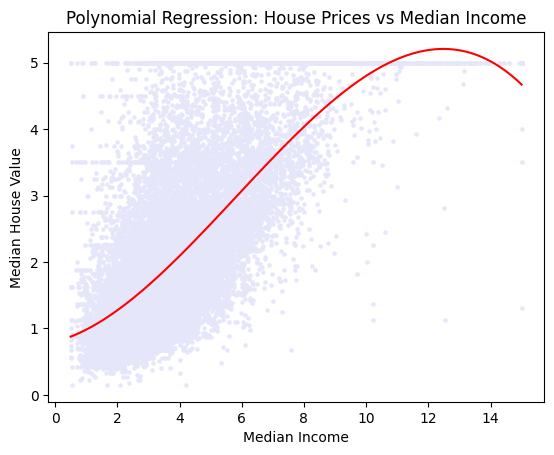

In [ ]:
ximport numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)

df['MedHouseVal'] = data.target

X = df[['MedInc']]
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)

model = LinearRegression()
model.fit(X_poly, y_train)

X_grid = np.linspace(min(X['MedInc']), max(X['MedInc']), 100).reshape(-1, 1)
X_grid_poly = poly.transform(X_grid)
y_grid_pred = model.predict(X_grid_poly)

plt.scatter(X, y, color='lavender', s=5)
plt.plot(X_grid, y_grid_pred, color='red')
plt.title('Polynomial Regression: House Prices vs Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()